In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")
data_by_month.head()

,Truck
0,39
1,41
2,57
3,61
4,54


In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')
index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
      

In [4]:
data_by_month.index=index
data_by_month.head()

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54


In [5]:
month=np.linspace(1,96,96).reshape(-1,1)

In [6]:
data_by_month['Month']=month.astype(int)
data_by_month

,Truck,Month
Date,,
2011-01-31,39,1
2011-02-28,41,2
2011-03-31,57,3
2011-04-30,61,4
2011-05-31,54,5
...,...,...
2018-08-31,10,92
2018-09-30,27,93
2018-10-31,19,94


In [7]:
y=data_by_month.iloc[:,0].values.reshape(-1,1)

In [8]:
X=data_by_month.iloc[:,1].values.reshape(-1,1)

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(X,y)

LinearRegression()

In [11]:
y_pred=lr.predict(X)

In [12]:
mean_squared_error(y,y_pred)

65.29708963533189

In [13]:
r2_score(y,y_pred)

0.5167839194456072

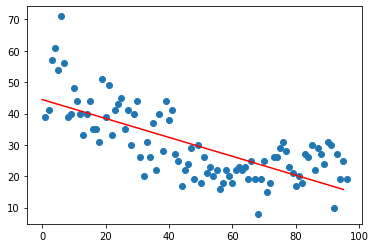

In [14]:
plt.plot(y_pred,color='r')
plt.scatter(X,y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 1), (29, 1), (67, 1), (29, 1))

1 . degree error: 64.67636463104687
2 . degree error: 35.15405663440235
3 . degree error: 37.1640120403969
4 . degree error: 38.281446287891264
5 . degree error: 36.25715752471961
6 . degree error: 37.45741899569541
7 . degree error: 43.64442399352172
8 . degree error: 38.089403700573456
9 . degree error: 36.353282000649706
10 . degree error: 39.967220148405524
11 . degree error: 47.50289478371595
12 . degree error: 50.08392573502686
13 . degree error: 53.562407017871166
14 . degree error: 58.711094687799964
15 . degree error: 66.55731908809793
16 . degree error: 78.0946330968965
17 . degree error: 93.23181078868014
18 . degree error: 112.12915629719723
19 . degree error: 133.67554898941768
20 . degree error: 156.37154113693202
21 . degree error: 184.0681354940549
22 . degree error: 126.96168169670021
23 . degree error: 126.73569583123253
24 . degree error: 125.86199197682014
25 . degree error: 125.16863248338194
26 . degree error: 125.11968737914079
27 . degree error: 125.798490310114

Text(0, 0.5, 'MSE')

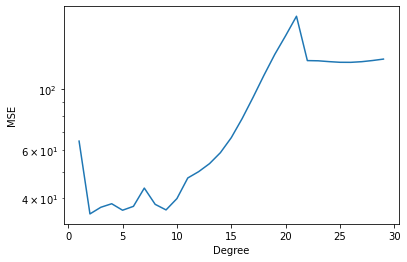

In [16]:
mse = []
degrees = np.arange(1,30)
min_mse, min_deg = 1e10, 0

for deg in range(1,30):
    poly_features=PolynomialFeatures(degree=deg)
    x_poly_train=poly_features.fit_transform(X_train)
    
    poly_reg =LinearRegression()
    poly_reg.fit(x_poly_train,y_train)
    
    x_poly_test = poly_features.fit_transform(X_test)
    y_pred=poly_reg.predict(x_poly_test)
    poly_mse=mean_squared_error(y_test,y_pred)
    mse.append(poly_mse)
    print(deg,'. degree error:',poly_mse)
    
    if min_mse > poly_mse:
        min_mse = poly_mse
        min_deg = deg

print('Best degree {} with MSE {}'.format(min_deg, min_mse))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, mse)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
    

In [17]:
pl=PolynomialFeatures(degree=6)

In [18]:
X_train=pl.fit_transform(X_train)
X_test=pl.fit_transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 7), (29, 7), (67, 1), (29, 1))

In [19]:
pl2=LinearRegression()

In [20]:
pl2.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=pl2.predict(X_test)

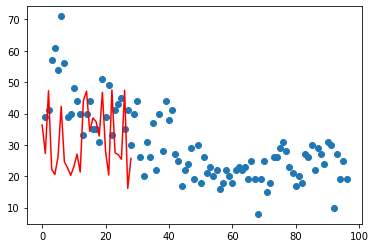

In [22]:
plt.plot(y_pred,color='r')
plt.scatter(X,y)

In [24]:
mean_squared_error(y_test,y_pred)

37.45741899569541

In [25]:
r2_score(y_test,y_pred)

0.7673022590756128

In [26]:
'''
mse = []
degrees = np.arange(1,30)
min_mse, min_deg = 1e10, 0

for deg in range(1,30):
    poly_features=PolynomialFeatures(degree=deg)
    x_poly=poly_features.fit_transform(X)
    
    poly_reg =LinearRegression()
    poly_reg.fit(x_poly,y)
    y_pred=poly_reg.predict(x_poly)
    poly_mse=mean_squared_error(y,y_pred)
    mse.append(poly_mse)
    print(deg,'. degree error:',poly_mse)
    
    if min_mse > poly_mse:
        min_mse = poly_mse
        min_deg = deg

print('Best degree {} with MSE {}'.format(min_deg, min_mse))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, mse)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
    '''

"\nmse = []\ndegrees = np.arange(1,30)\nmin_mse, min_deg = 1e10, 0\n\nfor deg in range(1,30):\n    poly_features=PolynomialFeatures(degree=deg)\n    x_poly=poly_features.fit_transform(X)\n    \n    poly_reg =LinearRegression()\n    poly_reg.fit(x_poly,y)\n    y_pred=poly_reg.predict(x_poly)\n    poly_mse=mean_squared_error(y,y_pred)\n    mse.append(poly_mse)\n    print(deg,'. degree error:',poly_mse)\n    \n    if min_mse > poly_mse:\n        min_mse = poly_mse\n        min_deg = deg\n\nprint('Best degree {} with MSE {}'.format(min_deg, min_mse))\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.plot(degrees, mse)\nax.set_yscale('log')\nax.set_xlabel('Degree')\nax.set_ylabel('MSE')\n    "